In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import logging
import joblib
logging.basicConfig(level=logging.INFO, format='%(levelname)s - %(message)s')


In [3]:
happiness_2015 = pd.read_csv("../data/2015.csv")
happy_2016 = pd.read_csv("../data/2016.csv")
happier_2017 = pd.read_csv("../data/2017.csv")
happiest_2018 = pd.read_csv("../data/2018.csv")
happierness_2019 = pd.read_csv("../data/2019.csv")

## 2015

In [4]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happiness_2015.shape

(158, 12)

In [6]:
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
happiness_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Análisis de Valores Nulos 

In [8]:
happiness_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
happiness_2015.duplicated().sum()

0

C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\2995052974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happiness_2015[column], palette="Set3")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\2995052974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happiness_2015[column], palette="Set3")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\2995052974.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happiness_2015[column], palette="Set3")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\2995052974.py:25: FutureWarni

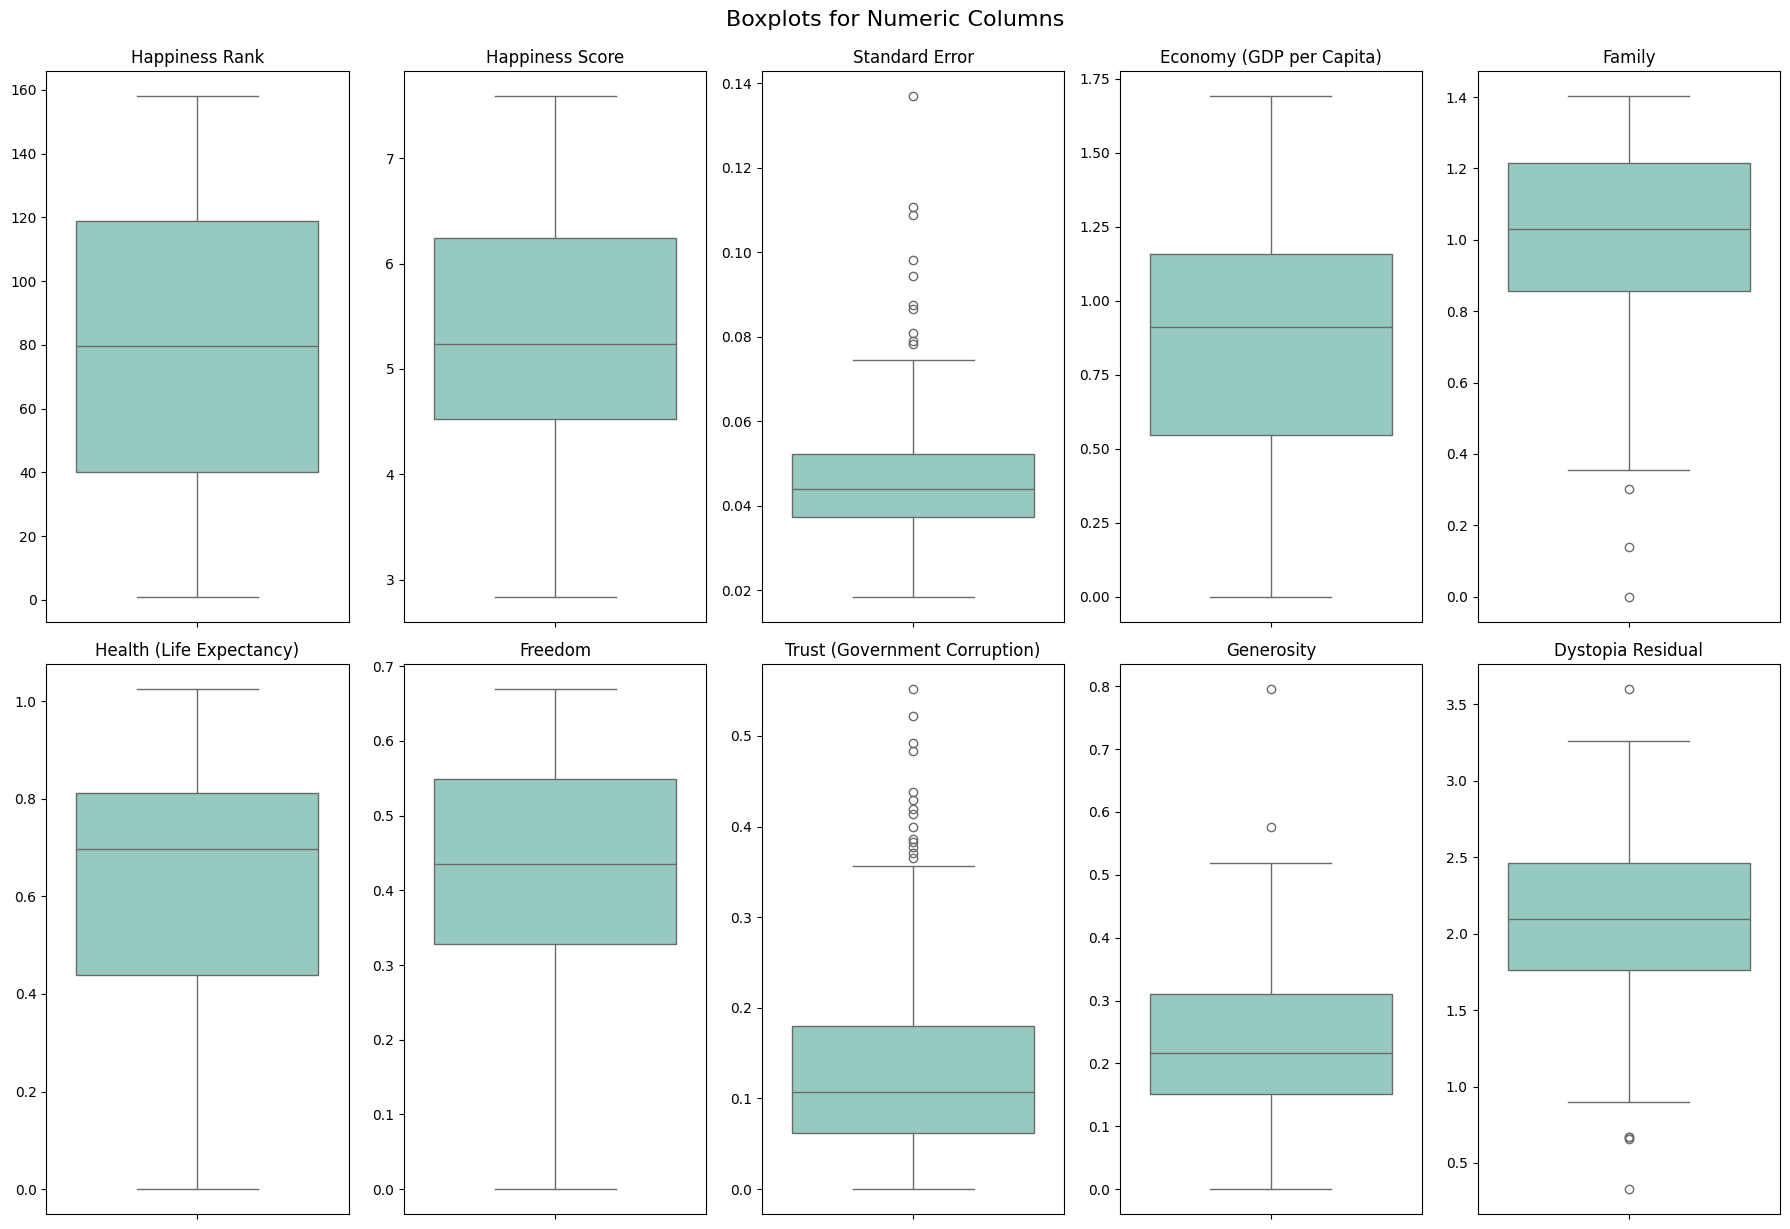

{'Happiness Rank': 0,
 'Happiness Score': 0,
 'Standard Error': 10,
 'Economy (GDP per Capita)': 0,
 'Family': 3,
 'Health (Life Expectancy)': 0,
 'Freedom': 0,
 'Trust (Government Corruption)': 14,
 'Generosity': 2,
 'Dystopia Residual': 5}

In [10]:

# Define a function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to analyze for outliers
numeric_columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 
                   'Family', 'Health (Life Expectancy)', 'Freedom', 
                   'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Detect outliers for each numeric column
outliers_dict = {}
for column in numeric_columns:
    outliers_dict[column] = detect_outliers(happiness_2015, column)

# Create boxplots for each numeric column
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=happiness_2015[column], palette="Set3")
    plt.title(column)
    plt.ylabel('')  # Remove y-label for clarity

plt.tight_layout()
plt.suptitle('Boxplots for Numeric Columns', fontsize=16, y=1.02)
plt.show()

# Display the number of outliers detected in each column
outliers_count = {column: len(outliers) for column, outliers in outliers_dict.items()}
outliers_count


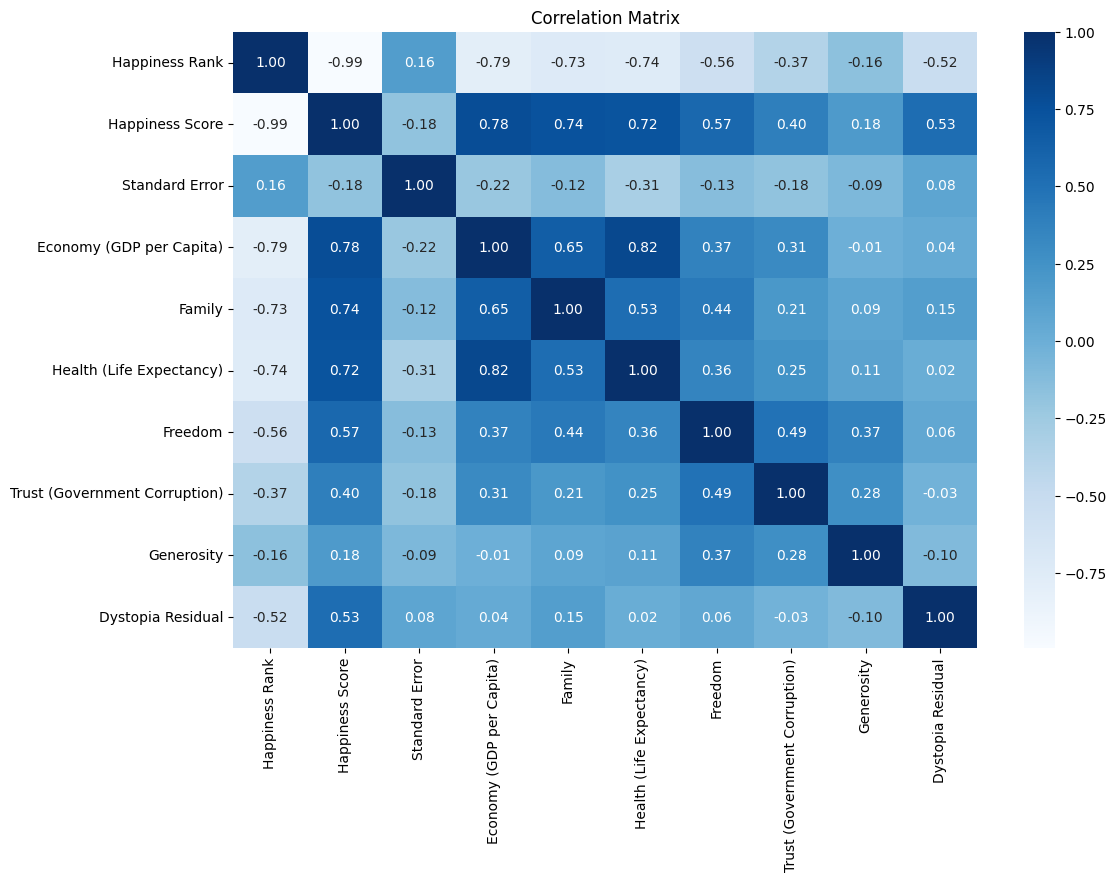

In [11]:
numeric_columns = happiness_2015.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [12]:
happiness_2015['year'] = 2015

logging.info("Columna 'year' añadida con el valor 2015.")

logging.info(f"Primeras filas del DataFrame:\n{happiness_2015.head()}")


INFO - Columna 'year' añadida con el valor 2015.
INFO - Primeras filas del DataFrame:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.6

## 2016

In [13]:
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [14]:
happy_2016.shape

(157, 13)

In [15]:
happy_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [16]:
happy_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [17]:
happy_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [18]:
happy_2016.duplicated().sum()

0

C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\170143097.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happy_2016[column], palette="Blues")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\170143097.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happy_2016[column], palette="Blues")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\170143097.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=happy_2016[column], palette="Blues")
C:\Users\JSLV3\AppData\Local\Temp\ipykernel_11876\170143097.py:24: FutureWarning: 

Passing

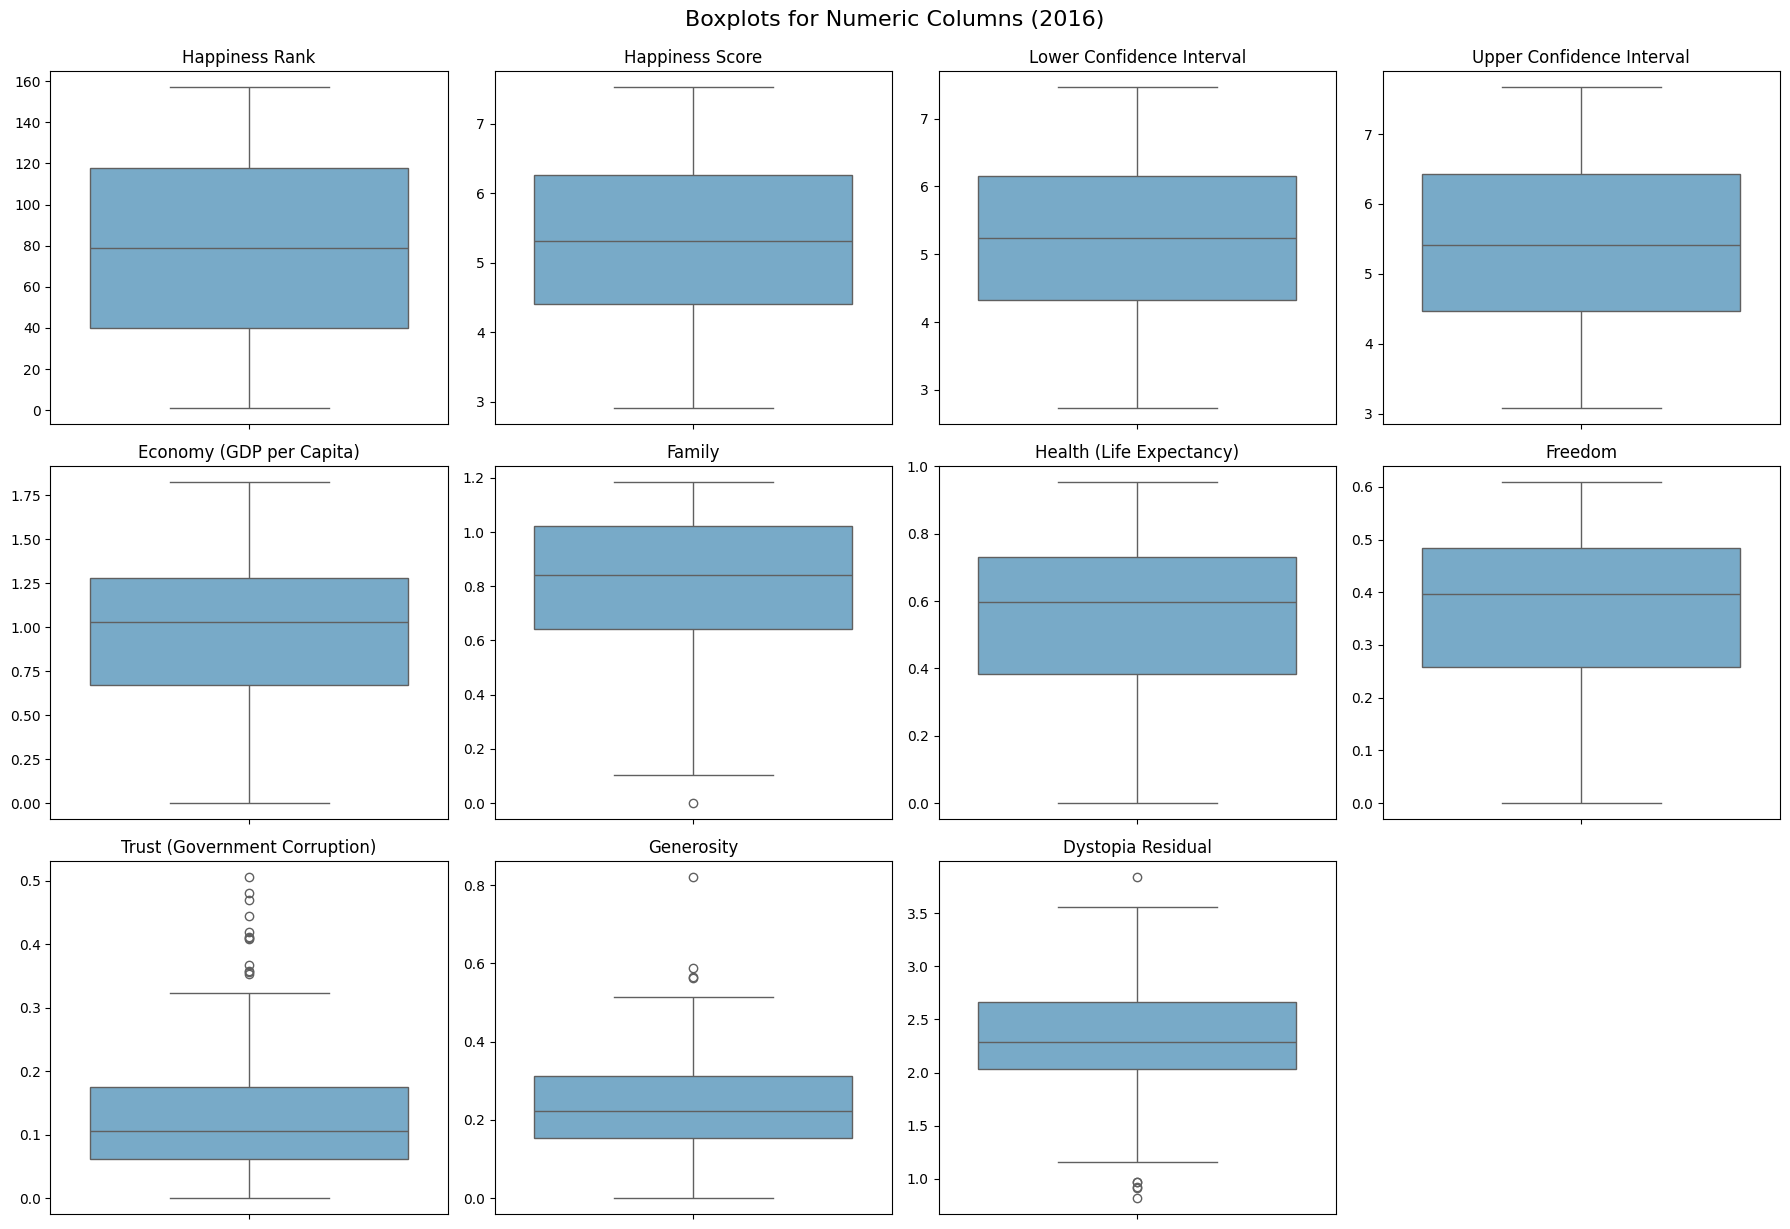

{'Happiness Rank': 0,
 'Happiness Score': 0,
 'Lower Confidence Interval': 0,
 'Upper Confidence Interval': 0,
 'Economy (GDP per Capita)': 0,
 'Family': 1,
 'Health (Life Expectancy)': 0,
 'Freedom': 0,
 'Trust (Government Corruption)': 12,
 'Generosity': 4,
 'Dystopia Residual': 6}

In [19]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to analyze for outliers
numeric_columns_2016 = ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval',
                        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                        'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Detect outliers for each numeric column
outliers_dict_2016 = {}
for column in numeric_columns_2016:
    outliers_dict_2016[column] = detect_outliers(happy_2016, column)

# Create boxplots for each numeric column
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns_2016, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=happy_2016[column], palette="Blues")
    plt.title(column)
    plt.ylabel('')  # Remove y-label for clarity

plt.tight_layout()
plt.suptitle('Boxplots for Numeric Columns (2016)', fontsize=16, y=1.02)
plt.show()

# Display the number of outliers detected in each column
outliers_count_2016 = {column: len(outliers) for column, outliers in outliers_dict_2016.items()}
outliers_count_2016


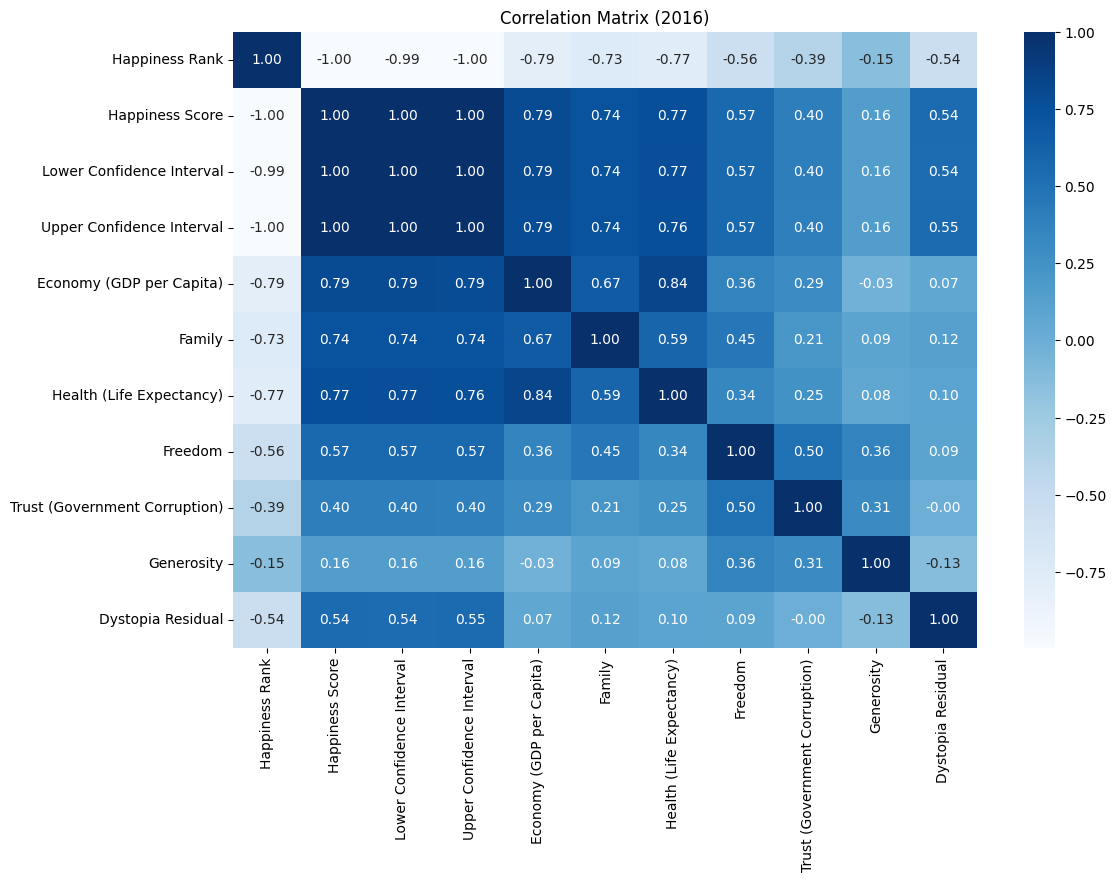

In [20]:
numeric_columns_2016 = happy_2016.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación para el dataset de 2016
correlation_matrix_2016 = numeric_columns_2016.corr()

# Crear y mostrar el gráfico de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2016, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix (2016)')
plt.show()



In [21]:
happy_2016['year'] = 2016

print(happy_2016.head())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

## 2017

In [22]:
happier_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [23]:
happier_2017.shape

(155, 12)

In [24]:
happier_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [25]:
happier_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [26]:
happier_2017.duplicated().sum()

0

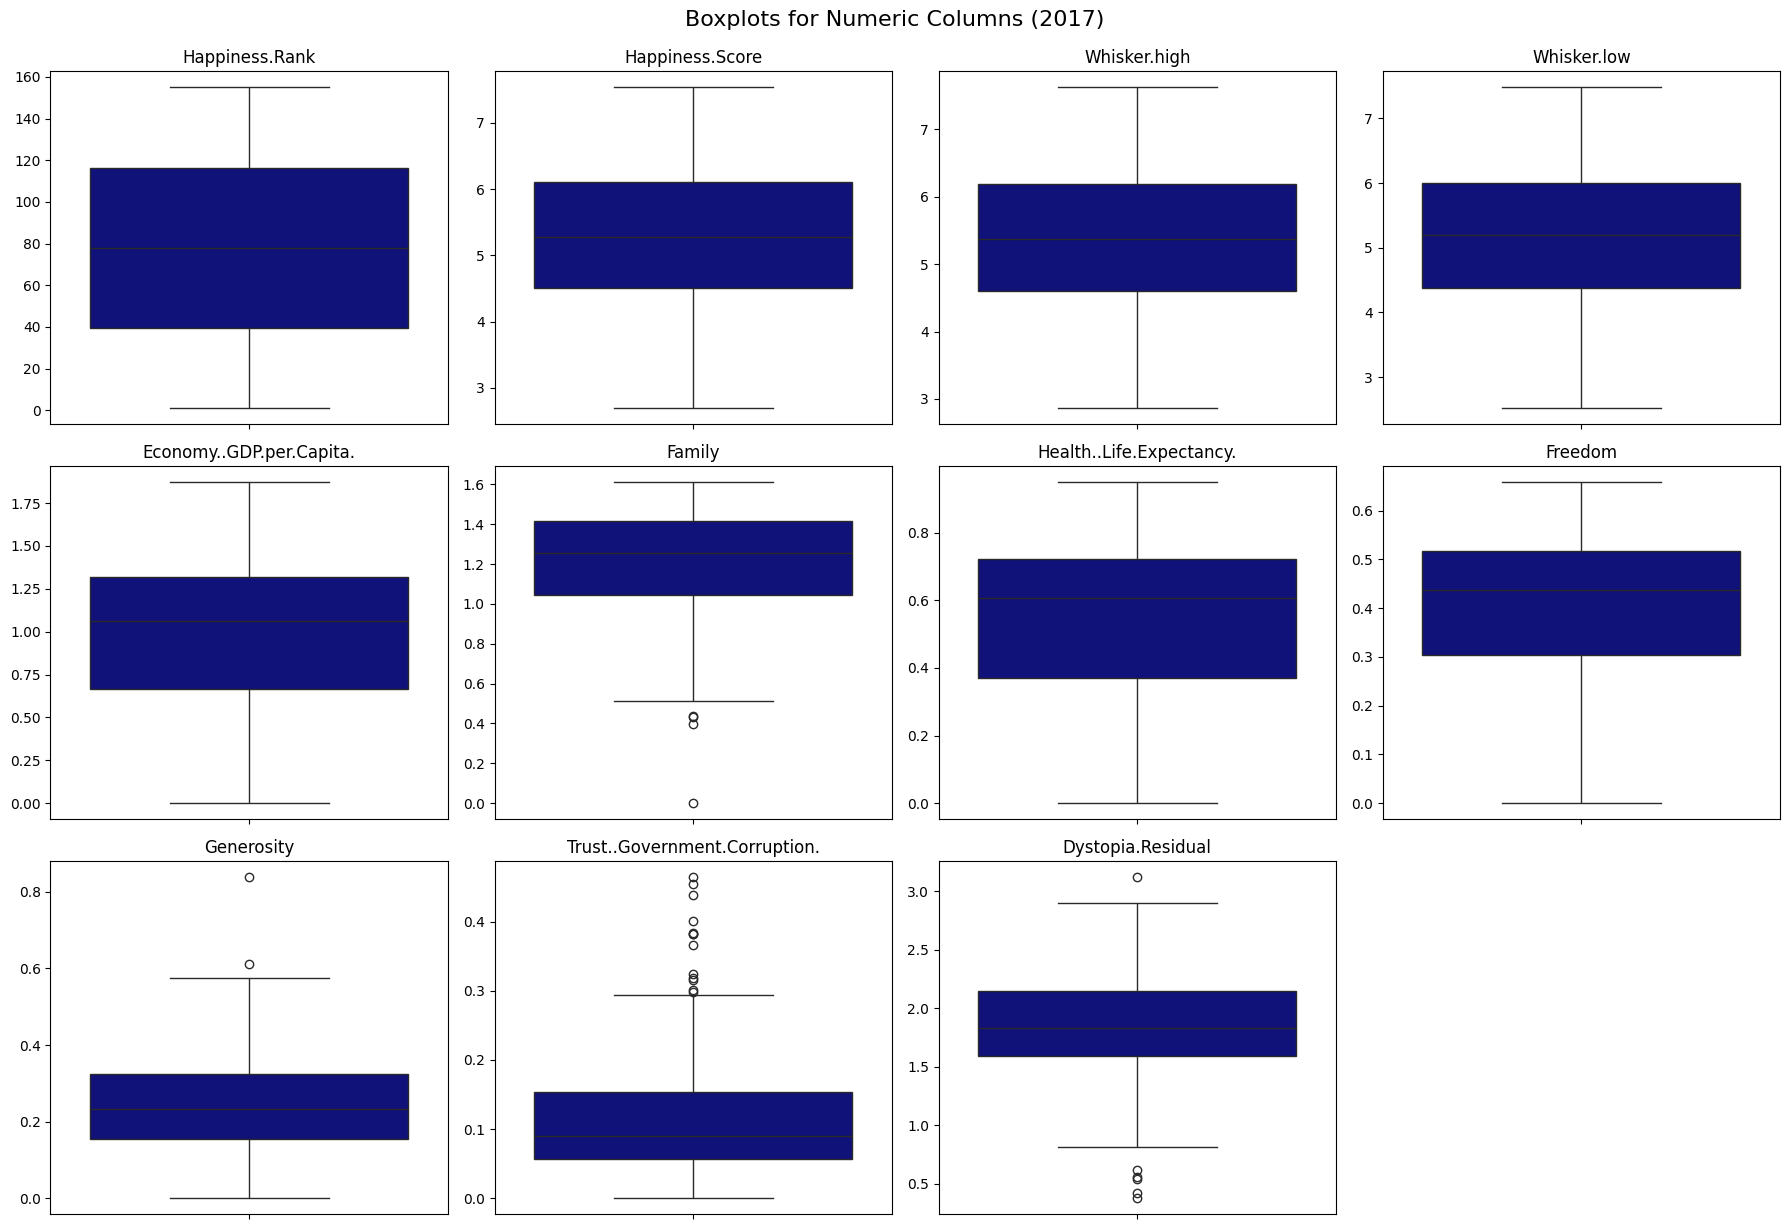

{'Happiness.Rank': 0,
 'Happiness.Score': 0,
 'Whisker.high': 0,
 'Whisker.low': 0,
 'Economy..GDP.per.Capita.': 0,
 'Family': 4,
 'Health..Life.Expectancy.': 0,
 'Freedom': 0,
 'Generosity': 2,
 'Trust..Government.Corruption.': 13,
 'Dystopia.Residual': 6}

In [27]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numeric_columns_2017 = ['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
                        'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
                        'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

outliers_dict_2017 = {}
for column in numeric_columns_2017:
    outliers_dict_2017[column] = detect_outliers(happier_2017, column)

plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns_2017, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=happier_2017[column], color="darkblue")
    plt.title(column)
    plt.ylabel('')  

plt.tight_layout()
plt.suptitle('Boxplots for Numeric Columns (2017)', fontsize=16, y=1.02)
plt.show()

outliers_count_2017 = {column: len(outliers) for column, outliers in outliers_dict_2017.items()}
outliers_count_2017


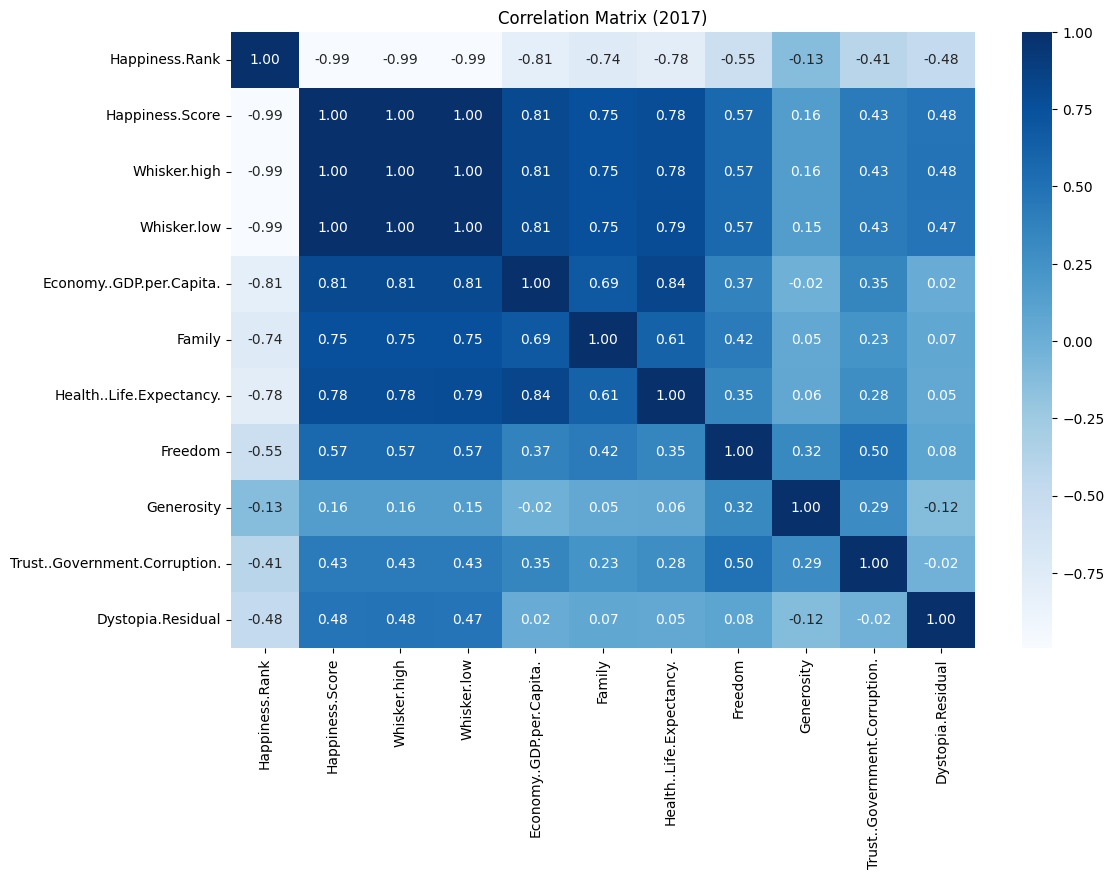

In [28]:
numeric_columns_2016 = happier_2017.select_dtypes(include=['float64', 'int64'])

correlation_matrix_2017 = numeric_columns_2016.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2017, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix (2017)')
plt.show()

In [29]:
happier_2017['year'] = 2017

print(happier_2017.head())

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  yea

## 2018

In [30]:
happiest_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [31]:
happiest_2018.shape

(156, 9)

In [32]:
happiest_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [33]:
happiest_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [34]:
happiest_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [35]:
happiest_2018 = happiest_2018.dropna(subset=['Perceptions of corruption'])

# Verify the removal
happiest_2018.isnull().sum()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [36]:
happiest_2018.duplicated().sum()

0

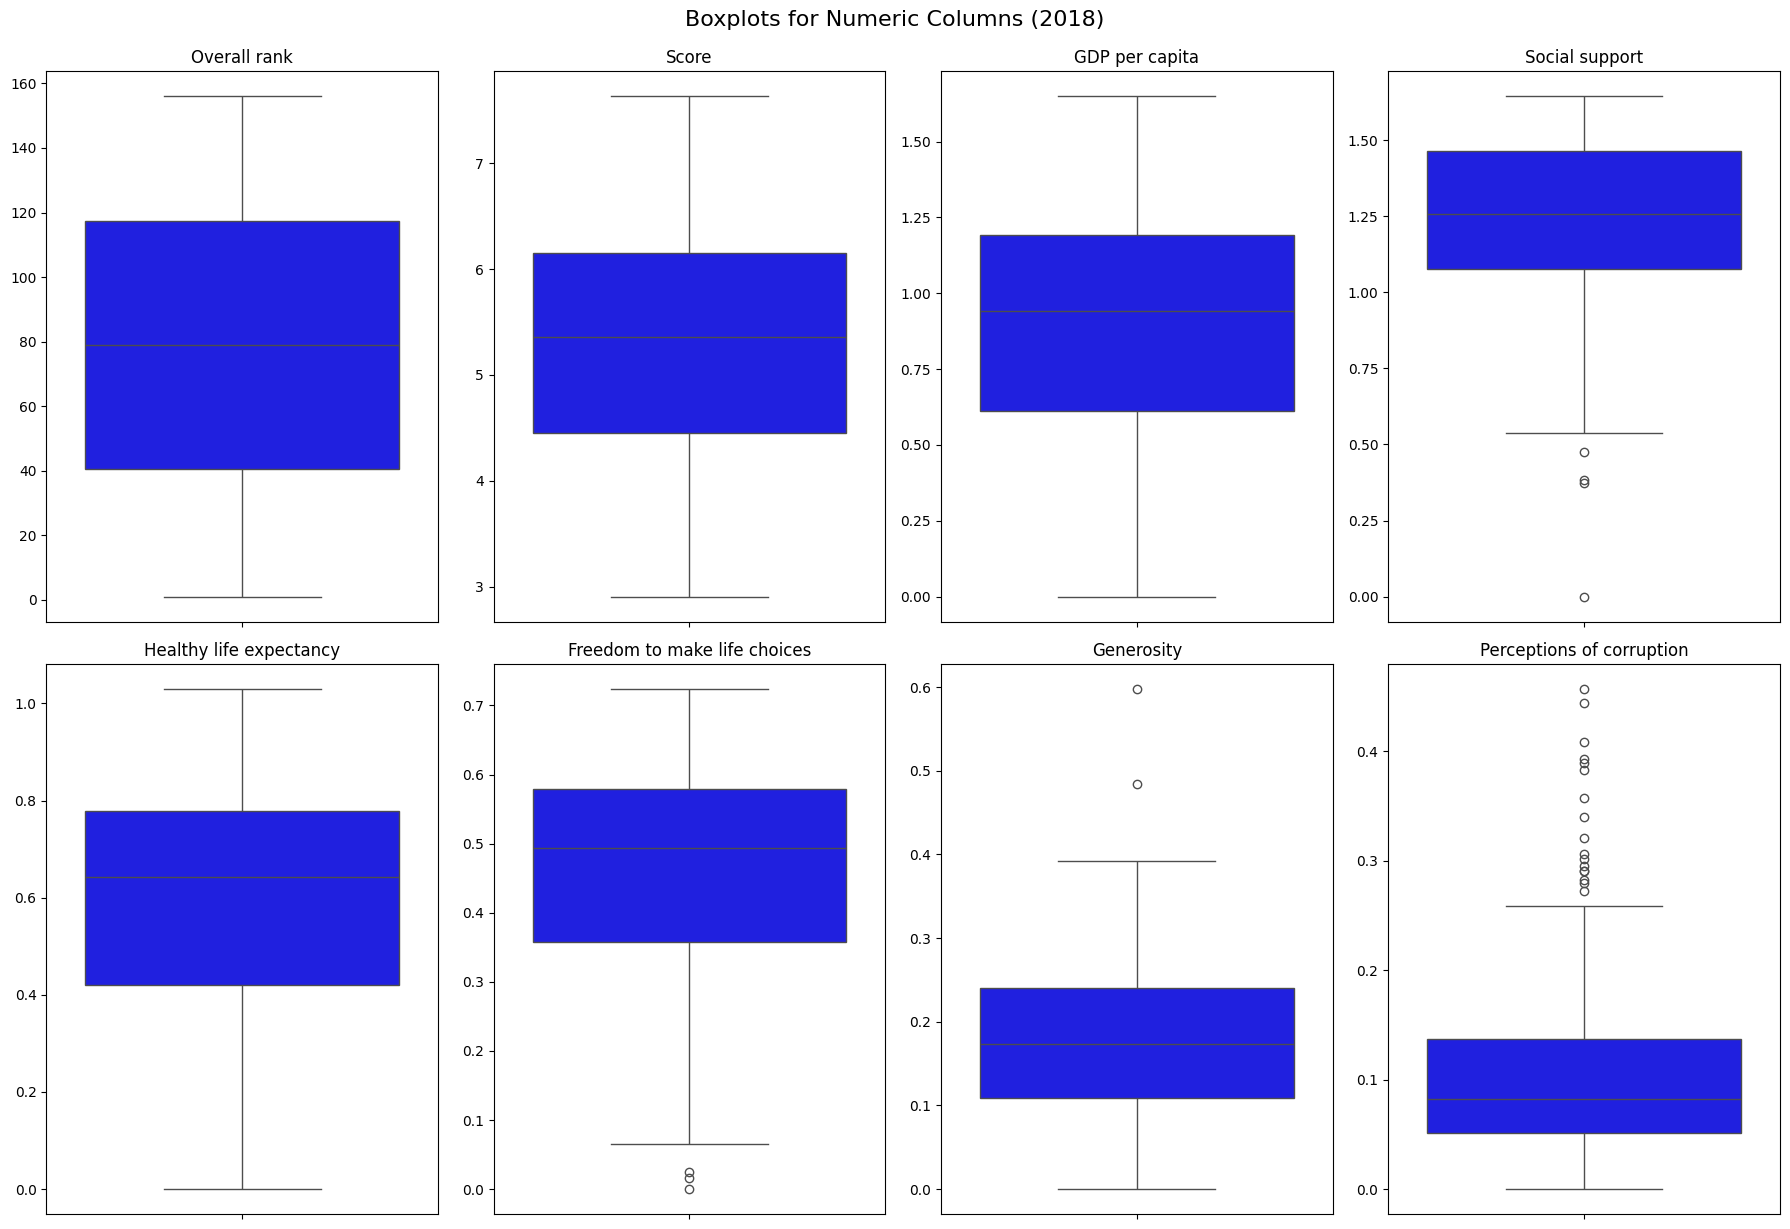

{'Overall rank': 0,
 'Score': 0,
 'GDP per capita': 0,
 'Social support': 4,
 'Healthy life expectancy': 0,
 'Freedom to make life choices': 3,
 'Generosity': 2,
 'Perceptions of corruption': 17}

In [37]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to analyze for outliers
numeric_columns_2018 = ['Overall rank', 'Score', 'GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']

# Detect outliers for each numeric column
outliers_dict_2018 = {}
for column in numeric_columns_2018:
    outliers_dict_2018[column] = detect_outliers(happiest_2018, column)

# Create boxplots for each numeric column
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns_2018, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=happiest_2018[column], color="blue")
    plt.title(column)
    plt.ylabel('')  # Remove y-label for clarity

plt.tight_layout()
plt.suptitle('Boxplots for Numeric Columns (2018)', fontsize=16, y=1.02)
plt.show()

# Display the number of outliers detected in each column
outliers_count_2018 = {column: len(outliers) for column, outliers in outliers_dict_2018.items()}
outliers_count_2018


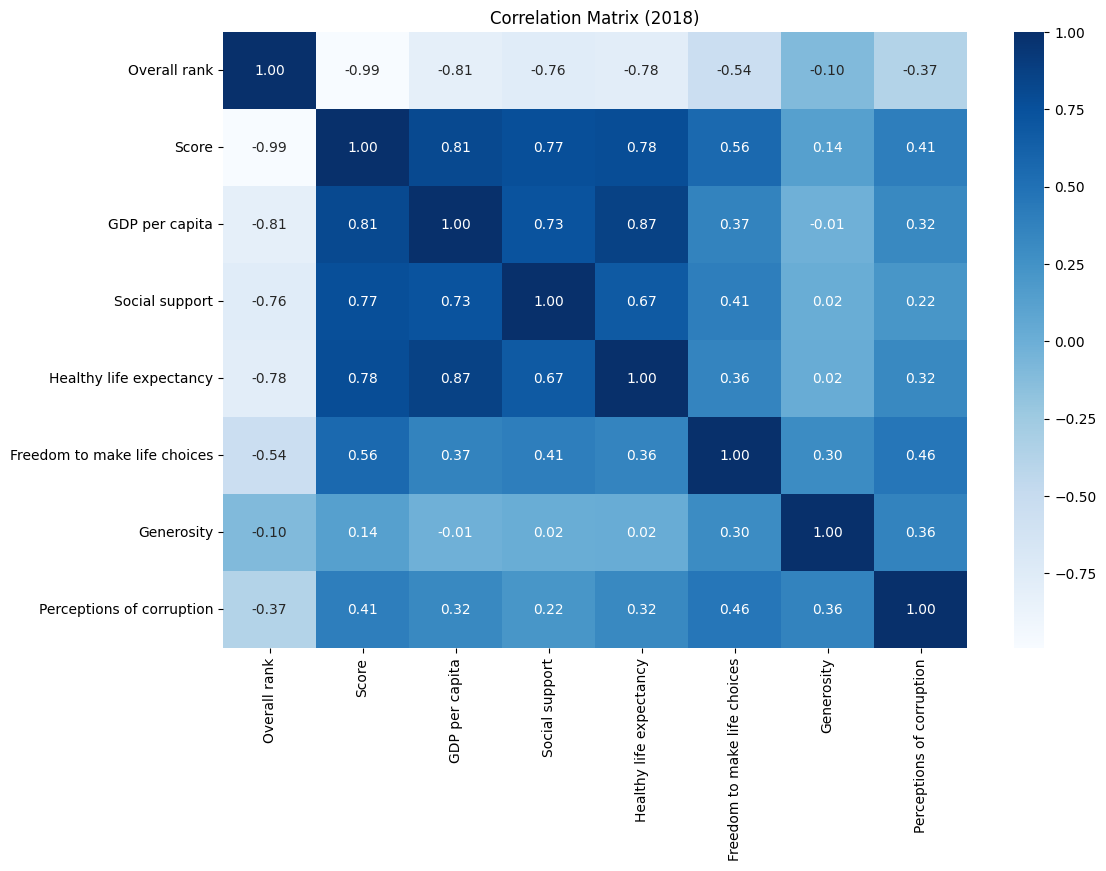

In [38]:
numeric_columns_2018 = happiest_2018.select_dtypes(include=['float64', 'int64'])

correlation_matrix_2018 = numeric_columns_2018.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2018, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix (2018)')
plt.show()


In [39]:
happiest_2018['year'] = 2018

print(happiest_2018.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  year  
0                      0.393  2018  
1                      0.340  2018  

## 2019

In [40]:
happierness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [41]:
happierness_2019.shape

(156, 9)

In [42]:
happierness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [43]:
happierness_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [44]:
happierness_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [45]:
happierness_2019.duplicated().sum()

0

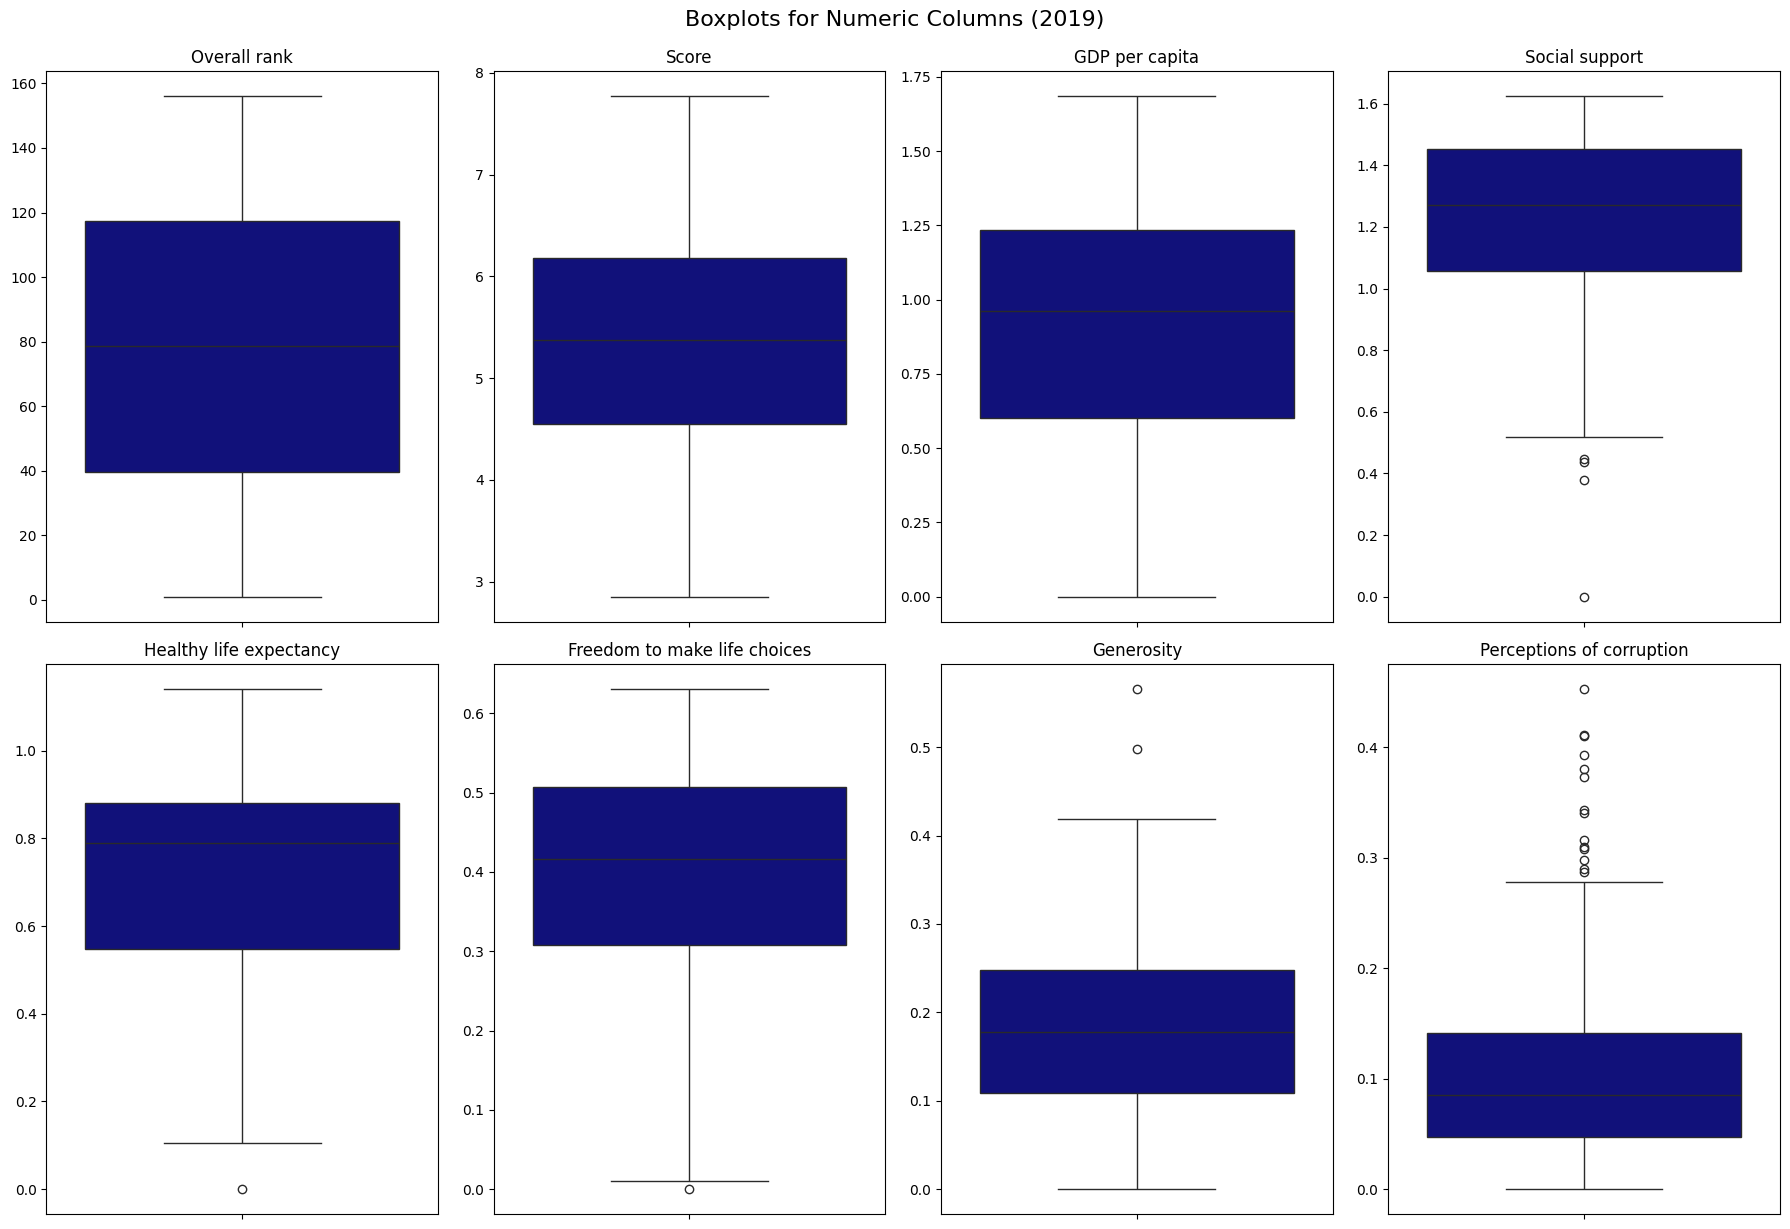

{'Overall rank': 0,
 'Score': 0,
 'GDP per capita': 0,
 'Social support': 4,
 'Healthy life expectancy': 1,
 'Freedom to make life choices': 1,
 'Generosity': 2,
 'Perceptions of corruption': 14}

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Columns to analyze for outliers
numeric_columns_2019 = ['Overall rank', 'Score', 'GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']

# Detect outliers for each numeric column
outliers_dict_2019 = {}
for column in numeric_columns_2019:
    outliers_dict_2019[column] = detect_outliers(happierness_2019, column)

# Create boxplots for each numeric column
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns_2019, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=happierness_2019[column], color="darkblue")
    plt.title(column)
    plt.ylabel('')  # Remove y-label for clarity

plt.tight_layout()
plt.suptitle('Boxplots for Numeric Columns (2019)', fontsize=16, y=1.02)
plt.show()

# Display the number of outliers detected in each column
outliers_count_2019 = {column: len(outliers) for column, outliers in outliers_dict_2019.items()}
outliers_count_2019


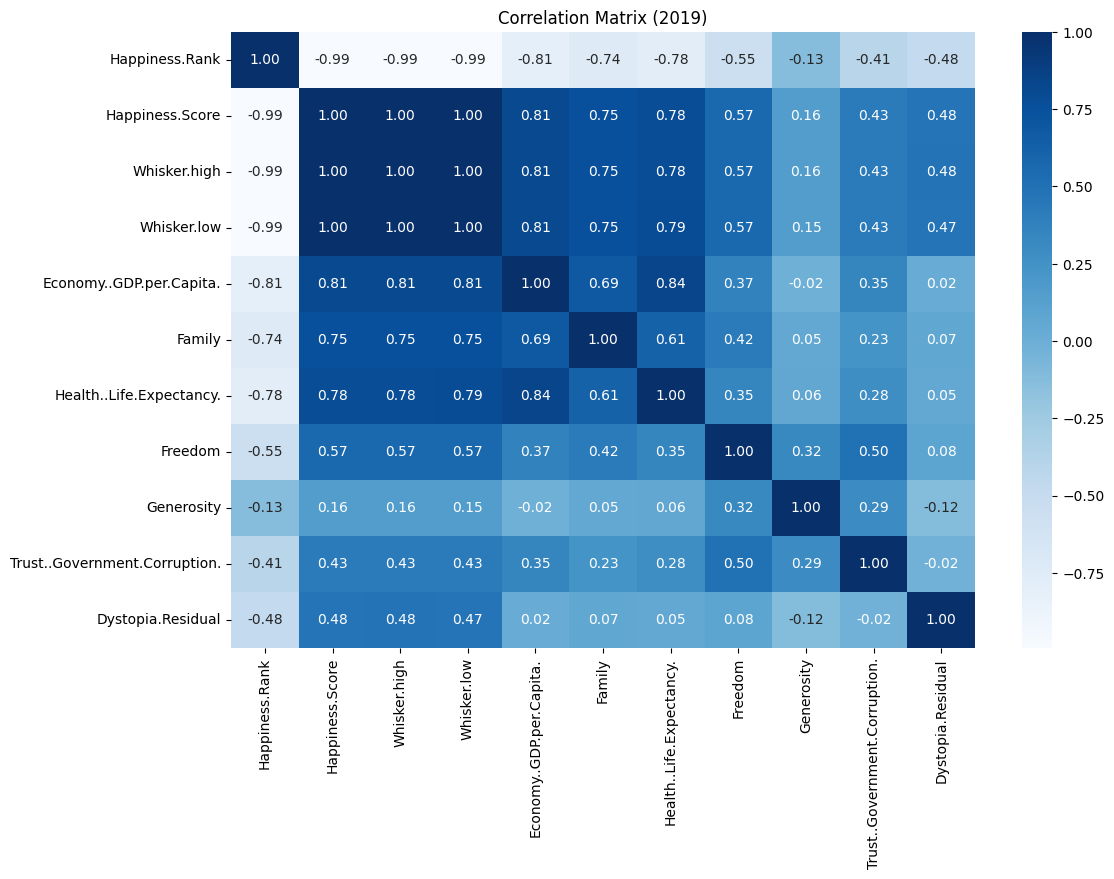

In [47]:
numeric_columns_2019 = happierness_2019.select_dtypes(include=['float64', 'int64'])

correlation_matrix_2019 = numeric_columns_2016.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2019, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix (2019)')
plt.show()


In [48]:
happierness_2019['year'] = 2019
print(happierness_2019.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  year  
0                      0.393  2019  
1                      0.410  2019  

## comparando datasets

In [49]:

columns_2015 = happiness_2015.columns.tolist()
columns_2016 = happy_2016.columns.tolist()
columns_2017 = happier_2017.columns.tolist()
columns_2018 = happiest_2018.columns.tolist()
columns_2019 = happierness_2019.columns.tolist()

# Asegurarse de que todas las listas de columnas tengan la misma longitud
max_length = max(len(columns_2015), len(columns_2016), len(columns_2017), len(columns_2018), len(columns_2019))

columns_2015 += [''] * (max_length - len(columns_2015))
columns_2016 += [''] * (max_length - len(columns_2016))
columns_2017 += [''] * (max_length - len(columns_2017))
columns_2018 += [''] * (max_length - len(columns_2018))
columns_2019 += [''] * (max_length - len(columns_2019))

# Crear el dataframe comparativo
comparison_df = pd.DataFrame({
    '2015': columns_2015,
    '2016': columns_2016,
    '2017': columns_2017,
    '2018': columns_2018,
    '2019': columns_2019
})

# Mostrar el dataframe comparativo en formato de tabla
from tabulate import tabulate

print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))


+----+-------------------------------+-------------------------------+-------------------------------+------------------------------+------------------------------+
|    |             2015              |             2016              |             2017              |             2018             |             2019             |
+----+-------------------------------+-------------------------------+-------------------------------+------------------------------+------------------------------+
| 0  |            Country            |            Country            |            Country            |         Overall rank         |         Overall rank         |
| 1  |            Region             |            Region             |        Happiness.Rank         |      Country or region       |      Country or region       |
| 2  |        Happiness Rank         |        Happiness Rank         |        Happiness.Score        |            Score             |            Score             |
| 3  |    

In [50]:
happiness_2015 = happiness_2015.drop(columns=['Region', 'Standard Error', 'Dystopia Residual'])
happy_2016 = happy_2016.drop(columns=['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
happier_2017 = happier_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])

In [51]:
rename_dict_2017 = {
    'Country': 'country',
    'Happiness.Rank': 'happiness_rank',
    'Happiness.Score': 'happiness_score',
    'Economy..GDP.per.Capita.': 'economy',
    'Health..Life.Expectancy.': 'life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust..Government.Corruption.': 'government_corruption',
    'Family': 'social_support'
}

rename_dict_2018_2019 = {
    'Country or region': 'country',
    'Score': 'happiness_score',
    'GDP per capita': 'economy',
    'Social support': 'social_support',
    'Healthy life expectancy': 'life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'government_corruption',
    'Overall rank': 'happiness_rank'
}

# Renombrar las columnas de los datasets de 2017, 2018 y 2019
happier_2017.rename(columns=rename_dict_2017, inplace=True)
happiest_2018.rename(columns=rename_dict_2018_2019, inplace=True)
happierness_2019.rename(columns=rename_dict_2018_2019, inplace=True)

# Renombrar las columnas de los datasets de 2015 y 2016 con el mismo formato
happiness_2015.rename(columns={
    'Country': 'country',
    'Happiness Rank': 'happiness_rank',
    'Happiness Score': 'happiness_score',
    'Economy (GDP per Capita)': 'economy',
    'Health (Life Expectancy)': 'life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'government_corruption',
    'Family': 'social_support'
}, inplace=True)

happy_2016.rename(columns={
    'Country': 'country',
    'Happiness Rank': 'happiness_rank',
    'Happiness Score': 'happiness_score',
    'Economy (GDP per Capita)': 'economy',
    'Health (Life Expectancy)': 'life_expectancy',
    'Freedom': 'freedom',
    'Generosity': 'generosity',
    'Trust (Government Corruption)': 'government_corruption',
    'Family': 'social_support'
}, inplace=True)





In [52]:

columns_2015 = happiness_2015.columns.tolist()
columns_2016 = happy_2016.columns.tolist()
columns_2017 = happier_2017.columns.tolist()
columns_2018 = happiest_2018.columns.tolist()
columns_2019 = happierness_2019.columns.tolist()

# Asegurarse de que todas las listas de columnas tengan la misma longitud
max_length = max(len(columns_2015), len(columns_2016), len(columns_2017), len(columns_2018), len(columns_2019))

columns_2015 += [''] * (max_length - len(columns_2015))
columns_2016 += [''] * (max_length - len(columns_2016))
columns_2017 += [''] * (max_length - len(columns_2017))
columns_2018 += [''] * (max_length - len(columns_2018))
columns_2019 += [''] * (max_length - len(columns_2019))

# Crear el dataframe comparativo
comparison_df = pd.DataFrame({
    '2015': columns_2015,
    '2016': columns_2016,
    '2017': columns_2017,
    '2018': columns_2018,
    '2019': columns_2019
})

# Mostrar el dataframe comparativo en formato de tabla
from tabulate import tabulate

print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))

+---+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|   |         2015          |         2016          |         2017          |         2018          |         2019          |
+---+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| 0 |        country        |        country        |        country        |    happiness_rank     |    happiness_rank     |
| 1 |    happiness_rank     |    happiness_rank     |    happiness_rank     |        country        |        country        |
| 2 |    happiness_score    |    happiness_score    |    happiness_score    |    happiness_score    |    happiness_score    |
| 3 |        economy        |        economy        |        economy        |        economy        |        economy        |
| 4 |    social_support     |    social_support     |    social_support     |    social_support     |    social_suppor

In [53]:
shapes = {
    '2015': happiness_2015.shape,
    '2016': happy_2016.shape,
    '2017': happier_2017.shape,
    '2018': happiest_2018.shape,
    '2019': happierness_2019.shape
}

# Crear un DataFrame con los shapes
shapes_df = pd.DataFrame.from_dict(shapes, orient='index', columns=['Rows', 'Columns'])

# Mostrar el DataFrame con los shapes
print(shapes_df)


      Rows  Columns
2015   158       10
2016   157       10
2017   155       10
2018   155       10
2019   156       10


In [54]:
dtypes_2015 = happiness_2015.dtypes
dtypes_2016 = happy_2016.dtypes
dtypes_2017 = happier_2017.dtypes
dtypes_2018 = happiest_2018.dtypes
dtypes_2019 = happierness_2019.dtypes


dtypes_df = pd.DataFrame({
    '2015': dtypes_2015,
    '2016': dtypes_2016,
    '2017': dtypes_2017,
    '2018': dtypes_2018,
    '2019': dtypes_2019
}).reset_index()

dtypes_df.rename(columns={'index': 'Column'}, inplace=True)

print(dtypes_df)


                  Column     2015     2016     2017     2018     2019
0                country   object   object   object   object   object
1                economy  float64  float64  float64  float64  float64
2                freedom  float64  float64  float64  float64  float64
3             generosity  float64  float64  float64  float64  float64
4  government_corruption  float64  float64  float64  float64  float64
5         happiness_rank    int64    int64    int64    int64    int64
6        happiness_score  float64  float64  float64  float64  float64
7        life_expectancy  float64  float64  float64  float64  float64
8         social_support  float64  float64  float64  float64  float64
9                   year    int64    int64    int64    int64    int64


## concatenar datasets

In [55]:
happy_df = pd.concat([happiness_2015, happy_2016, happier_2017, happiest_2018, happierness_2019], ignore_index=True)

happy_df

,country,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,government_corruption,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
776,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
777,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
778,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
779,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


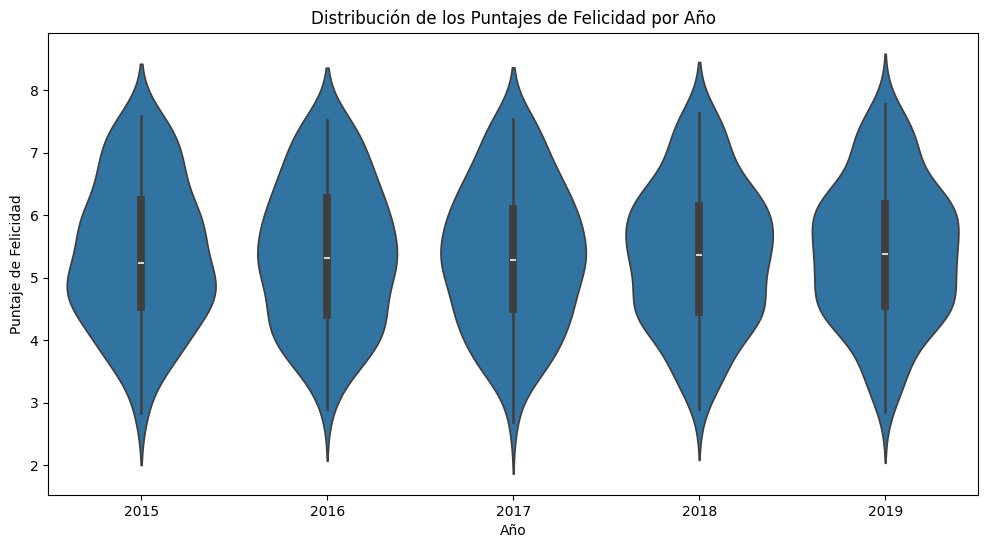

In [56]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='happiness_score', data=happy_df)
plt.title('Distribución de los Puntajes de Felicidad por Año')
plt.xlabel('Año')
plt.ylabel('Puntaje de Felicidad')
plt.show()


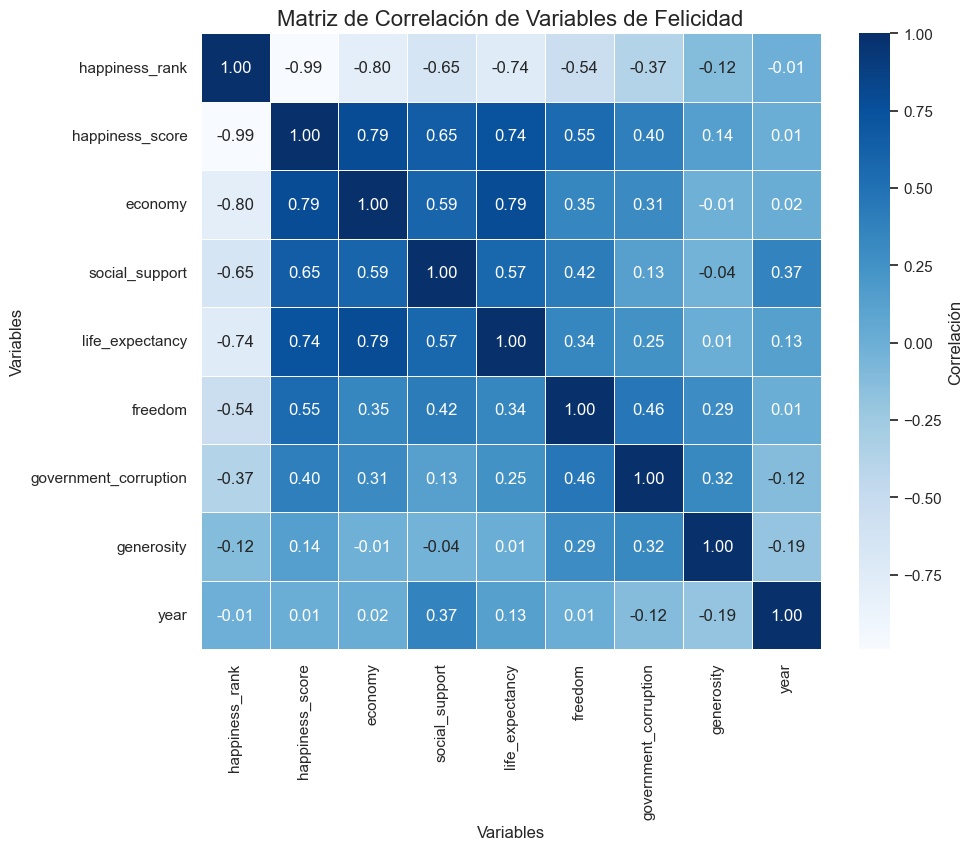

In [57]:
numeric_cols = happy_df.select_dtypes(include='number')

correlacion_happy_df = numeric_cols.corr()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlacion_happy_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación de Variables de Felicidad', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

plt.show()


In [58]:
# Seleccionar solo las columnas numéricas para el cálculo de la matriz de correlación
numeric_cols = happy_df.select_dtypes(include='number')

# Calcular la matriz de correlación solo con las columnas numéricas
correlaciones = numeric_cols.corr()

# Variables que más impactan el país más feliz
impacto_pais_mas_feliz = correlaciones['happiness_score'].sort_values(ascending=False)

# Variables que más impactan el país menos feliz
impacto_pais_menos_feliz = correlaciones['happiness_score'].sort_values(ascending=True)

impacto_pais_mas_feliz, impacto_pais_menos_feliz


(happiness_score          1.000000
 economy                  0.789719
 life_expectancy          0.742843
 social_support           0.651246
 freedom                  0.553365
 government_corruption    0.398418
 generosity               0.138142
 year                     0.005946
 happiness_rank          -0.992053
 Name: happiness_score, dtype: float64,
 happiness_rank          -0.992053
 year                     0.005946
 generosity               0.138142
 government_corruption    0.398418
 freedom                  0.553365
 social_support           0.651246
 life_expectancy          0.742843
 economy                  0.789719
 happiness_score          1.000000
 Name: happiness_score, dtype: float64)

In [59]:
# Crear un diccionario que mapee cada país a su continente
pais_a_continente = {
    'Switzerland': 'Europe',
    'Iceland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Canada': 'North America',
    'Finland': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'New Zealand': 'Oceania',
    'Australia': 'Oceania',
    'Israel': 'Asia',
    'Costa Rica': 'North America',
    'Austria': 'Europe',
    'Mexico': 'North America',
    'United States': 'North America',
    'Brazil': 'South America',
    'Luxembourg': 'Europe',
    'Ireland': 'Europe',
    'Belgium': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'Oman': 'Asia',
    'Venezuela': 'South America',
    'Singapore': 'Asia',
    'Panama': 'North America',
    'Germany': 'Europe',
    'Chile': 'South America',
    'Qatar': 'Asia',
    'France': 'Europe',
    'Argentina': 'South America',
    'Czech Republic': 'Europe',
    'Uruguay': 'South America',
    'Colombia': 'South America',
    'Thailand': 'Asia',
    'Saudi Arabia': 'Asia',
    'Spain': 'Europe',
    'Malta': 'Europe',
    'Taiwan': 'Asia',
    'Kuwait': 'Asia',
    'Suriname': 'South America',
    'Trinidad and Tobago': 'North America',
    'El Salvador': 'North America',
    'Guatemala': 'North America',
    'Uzbekistan': 'Asia',
    'Slovakia': 'Europe',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Ecuador': 'South America',
    'Bahrain': 'Asia',
    'Italy': 'Europe',
    'Bolivia': 'South America',
    'Moldova': 'Europe',
    'Paraguay': 'South America',
    'Kazakhstan': 'Asia',
    'Slovenia': 'Europe',
    'Lithuania': 'Europe',
    'Nicaragua': 'North America',
    'Peru': 'South America',
    'Belarus': 'Europe',
    'Poland': 'Europe',
    'Malaysia': 'Asia',
    'Croatia': 'Europe',
    'Libya': 'Africa',
    'Russia': 'Europe/Asia',
    'Jamaica': 'North America',
    'North Cyprus': 'Europe',
    'Cyprus': 'Europe',
    'Algeria': 'Africa',
    'Kosovo': 'Europe',
    'Turkmenistan': 'Asia',
    'Mauritius': 'Africa',
    'Hong Kong': 'Asia',
    'Estonia': 'Europe',
    'Indonesia': 'Asia',
    'Vietnam': 'Asia',
    'Turkey': 'Europe/Asia',
    'Kyrgyzstan': 'Asia',
    'Nigeria': 'Africa',
    'Bhutan': 'Asia',
    'Azerbaijan': 'Asia',
    'Pakistan': 'Asia',
    'Jordan': 'Asia',
    'Montenegro': 'Europe',
    'China': 'Asia',
    'Zambia': 'Africa',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Portugal': 'Europe',
    'Latvia': 'Europe',
    'Philippines': 'Asia',
    'Somaliland region': 'Africa',
    'Morocco': 'Africa',
    'Macedonia': 'Europe',
    'Mozambique': 'Africa',
    'Albania': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Lesotho': 'Africa',
    'Dominican Republic': 'North America',
    'Laos': 'Asia',
    'Mongolia': 'Asia',
    'Swaziland': 'Africa',
    'Greece': 'Europe',
    'Lebanon': 'Asia',
    'Hungary': 'Europe',
    'Honduras': 'North America',
    'Tajikistan': 'Asia',
    'Tunisia': 'Africa',
    'Palestinian Territories': 'Asia',
    'Bangladesh': 'Asia',
    'Iran': 'Asia',
    'Ukraine': 'Europe',
    'Iraq': 'Asia',
    'South Africa': 'Africa',
    'Ghana': 'Africa',
    'Zimbabwe': 'Africa',
    'Liberia': 'Africa',
    'India': 'Asia',
    'Sudan': 'Africa',
    'Haiti': 'North America',
    'Congo (Kinshasa)': 'Africa',
    'Nepal': 'Asia',
    'Ethiopia': 'Africa',
    'Sierra Leone': 'Africa',
    'Mauritania': 'Africa',
    'Kenya': 'Africa',
    'Djibouti': 'Africa',
    'Armenia': 'Asia',
    'Botswana': 'Africa',
    'Myanmar': 'Asia',
    'Georgia': 'Asia/Europe',
    'Malawi': 'Africa',
    'Sri Lanka': 'Asia',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Egypt': 'Africa',
    'Yemen': 'Asia',
    'Angola': 'Africa',
    'Mali': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Comoros': 'Africa',
    'Uganda': 'Africa',
    'Senegal': 'Africa',
    'Gabon': 'Africa',
    'Niger': 'Africa',
    'Cambodia': 'Asia',
    'Tanzania': 'Africa',
    'Madagascar': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Guinea': 'Africa',
    'Ivory Coast': 'Africa',
    'Burkina Faso': 'Africa',
    'Afghanistan': 'Asia',
    'Rwanda': 'Africa',
    'Benin': 'Africa',
    'Syria': 'Asia',
    'Burundi': 'Africa',
    'Togo': 'Africa',
    'Puerto Rico': 'North America',
    'Belize': 'North America',
    'Somalia': 'Africa',
    'Somaliland Region': 'Africa',
    'Namibia': 'Africa',
    'South Sudan': 'Africa',
    'Taiwan Province of China': 'Asia',
    'Hong Kong S.A.R., China': 'Asia',
    'Trinidad & Tobago': 'North America',
    'Northern Cyprus': 'Europe',
    'North Macedonia': 'Europe',
    'Gambia': 'Africa',
}

# Crear una nueva columna 'Continent' en el dataframe
happy_df['continent'] = happy_df['country'].map(pais_a_continente)

# Mostrar las primeras filas para verificar
happy_df.head()


,country,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,government_corruption,generosity,year,continent
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Europe
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


In [66]:
# Verificar que la columna 'Continent' esté presente
if 'continent' in happy_df.columns:
    # Eliminar las columnas dummy creadas previamente
    columns_to_drop = [col for col in happy_df.columns if col.startswith('continent_')]
    happy_df = happy_df.drop(columns=columns_to_drop)

    # Crear las variables dummy nuevamente asegurándonos de que queden en 0 y 1
    happy_df = pd.get_dummies(happy_df, columns=['continent'], drop_first=True)

    # Convertir solo las columnas dummy a enteros
    dummy_columns = happy_df.columns[happy_df.columns.str.startswith('continent_')]
    happy_df[dummy_columns] = happy_df[dummy_columns].astype(int)

    # Mostrar las primeras filas para verificar
    display(happy_df.head())
else:
    print("La columna 'Continent' no está presente en el dataframe.")


,happiness_score,economy,social_support,life_expectancy,freedom,government_corruption,generosity,year,continent_Asia,continent_Asia/Europe,continent_Europe,continent_Europe/Asia,continent_North America,continent_Oceania,continent_South America
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,1,0,0,0,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,1,0,0,0,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,1,0,0,0,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,1,0,0,0,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,0,1,0,0


In [61]:
# # Aplicar la creación de variables dummy al dataframe original y convertir a enteros
# happy_df = pd.get_dummies(happy_df, columns=['continent'], drop_first=True)

# # Convertir solo las columnas dummy a enteros
# dummy_columns = happy_df.columns[happy_df.columns.str.startswith('continent_')]
# happy_df[dummy_columns] = happy_df[dummy_columns].astype(int)

# # Mostrar las primeras filas para verificar
# happy_df.head()


In [67]:
happy_df= happy_df.drop(columns=['country', 'happiness_rank'])
happy_df.head()


KeyError: "['country', 'happiness_rank'] not found in axis"

## Model Training

In [68]:
X = happy_df.drop(columns=['happiness_score'])
y = happy_df['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [69]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape


((546, 14), (235, 14), (546,), (235,))

In [70]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=50),
    'Random Forest': RandomForestRegressor(random_state=50),
    'XGBoost': XGBRegressor(random_state=50)
}

# Entrenar y evaluar los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Mostrar los resultados
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R² Score: {metrics['R²']}")
    print("-" * 30)


Model: Linear Regression
Mean Squared Error (MSE): 0.22821703692551107
R² Score: 0.8264232010425752
------------------------------
Model: Decision Tree
Mean Squared Error (MSE): 0.3939734421622155
R² Score: 0.7003525683883279
------------------------------
Model: Random Forest
Mean Squared Error (MSE): 0.16141668549454125
R² Score: 0.8772300615943722
------------------------------
Model: XGBoost
Mean Squared Error (MSE): 0.166230665965185
R² Score: 0.8735686551910868
------------------------------


eleccion modelo

In [71]:
my_happiness_model = RandomForestRegressor(random_state=50)

my_happiness_model.fit(X_train, y_train)
print('Model trained')

joblib.dump(my_happiness_model, 'my_happiness_model.pkl')
print('Model saved as my_happiness_model.pkl')


Model trained
Model saved as my_happiness_model.pkl
